### Formulas used for sales forecasting



### Intialization of required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker as tckr
import shutil

print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)
print("Pandas v" + pd.__version__)

sns.set(style="ticks", color_codes=True)
sns.set_style("darkgrid")

TensorFlow v1.10.1
Numpy v1.14.5
Pandas v0.23.4


### Reading of dataset from csv file

In [2]:
df_annual_sales = pd.read_csv('./csv/train/annual_sales.csv')

df_monthly_sales = pd.read_csv('./csv/train/monthly_sales.csv')
df_monthly_sales_count = pd.read_csv('./csv/train/monthly_sales_count.csv')
df_monthly_over_annual_sales = pd.read_csv('./csv/train/monthly_over_annual_sales.csv')
df_combined_monthly_reports = pd.read_csv('./csv/train/combined_monthly_reports.csv')

df_monthly_mean = pd.read_csv('./csv/train/monthly_mean.csv')

### Plotting of annual sales

   BUSINESS_YEAR  ANNUAL_SALES  ANNUAL_INTEREST
0           2000        374180     1.683847e+10
1           2001        373964     1.684598e+10
2           2002        373639     1.682903e+10
3           2003        374247     1.686503e+10
4           2004        373636     1.683663e+10


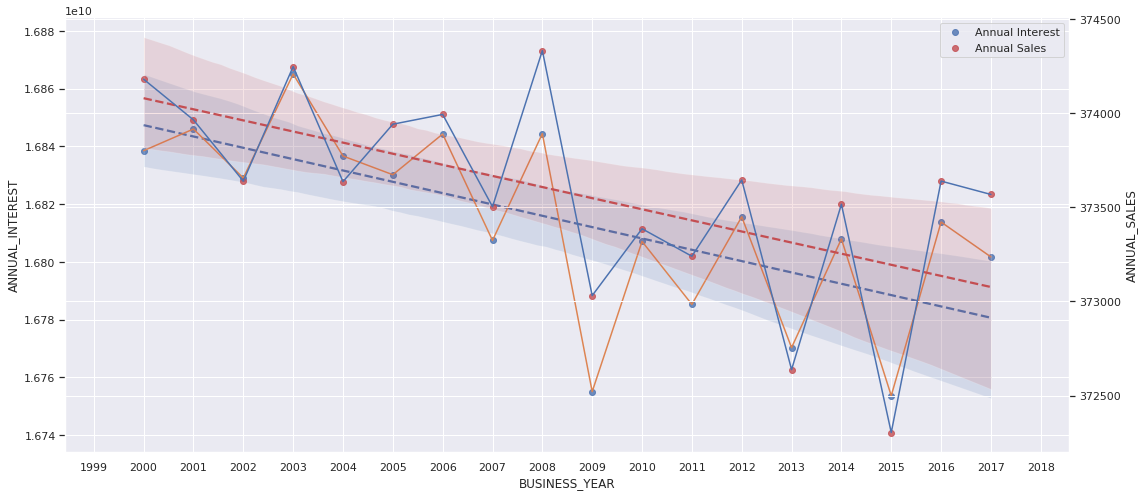

In [28]:
print(df_annual_sales.head())

# Declare base figure plot
fig, ax = plt.subplots(figsize=(18, 8))

# Draw regression line for annual interest
ai_reg = sns.regplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', label="Annual Interest", data=df_annual_sales, ax=ax, truncate=True)
ai_reg.set(xlabel = "Business Year", ylabel = "Annual Interest")
ai_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

# Draw line plot to trace scattered points from regression plot
ai_line = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', legend=None, data=df_annual_sales, ax=ax)

# Make secondary axis to overlap plotting for annual sales
ax2 = ax.twinx()

# Draw regression line for annual sales
as_reg = sns.regplot(x='BUSINESS_YEAR', y='ANNUAL_SALES', label="Annual Sales", data=df_annual_sales, ax=ax2, truncate=True, color='r')
as_reg.set(xlabel = "Business Year", ylabel = "Annual Sales")
as_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

# Draw line plot to trace scattered points from regression plot
as_line = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_SALES', legend=None, data=df_annual_sales, ax=ax2)

# Make regression line from base axis and secondary axis dashed lines
ax.lines[0].set_linestyle("--")
ax2.lines[0].set_linestyle("--")

# Compile legends from axes and display it on base axis
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)

In [19]:
# FEATURES = ['business_month', 'business_year']
# TARGET = 'interest'

# columns = list([TARGET])
# columns.extend(FEATURES)

# df_train = pd.read_csv('./csv/sales_train.csv', header = None, names = columns)
# df_valid = pd.read_csv('./csv/sales_eval.csv', header = None, names = columns)
# df_test = pd.read_csv('./csv/sales_test.csv', header = None, names = columns)

## Manual computations

In [5]:
# len_train = len(df_train)
# mean_x = 0

# for i in range(len_train) :
#     mean_x += df_train['interest'][i];
    
# mean_x /= len_train

# print(mean_x)

# mean_y = 0;

# for i in range(len_train) :
#     mean_y += df_train['business_month'][i];
    
# mean_y /= len_train

# print(mean_y)

# slope_m = 0
# xn_mean_x = 0
# yn_mean_x = 0
# a = 0
# b = 0

# for i in range(len_train) :
#     xn_mean_x = (df_train['interest'][i] - mean_x)
#     yn_mean_x = (df_train['business_month'][i] - mean_y)
#     a += xn_mean_x * yn_mean_x
#     b += xn_mean_x * xn_mean_x
    
# slope_m = a/b

# print(slope_m)

# intercept_y = mean_y - (slope_m * mean_x)

# print(intercept_y)

# def linear_equation(x) :
#     return slope_m * x + intercept_y

# print(linear_equation(12))

## Plotting of datasets

In [6]:
# # plot_train = sns.regplot(x = "business_month", y = "interest", ci = None, truncate = True, data = df_train)

# train_x = df_train['business_month'].values[:, np.newaxis]
# train_y = df_train['interest'].values

# plt.scatter(train_x, train_y, color = 'b')


# predictions = model.predict(input_fn = make_prediction_input_fn(df_train['business_month'], 5))

# test = []

# for i in range(len_train) :
#     test.append(linear_equation(df_train['business_month']))


# plt.plot(df_train['business_month'].values, test, color = 'black', linewidth = 3)
# plt.show()
    
# # plot_valid = sns.regplot(x = "business_month", y = "interest", ci = None, truncate = True, data = df_valid)
# # plot_valid = sns.regplot(x = "business_month", y = "interest", ci = None, truncate = True, data = df_test)

## Definition of  core functions

In [7]:
# def make_input_fn(df, num_epochs):
# 	return tf.estimator.inputs.pandas_input_fn(
# 		x = df,
# 		y = df[TARGET],
# 		batch_size = 512,
# 		num_epochs = num_epochs,
# 		shuffle = True,
# 		queue_capacity = 1000,
# 		num_threads = 1
# 	)

# def make_prediction_input_fn(df, num_epochs):
# 	return tf.estimator.inputs.pandas_input_fn(
# 		x = df,
# 		y = None,
# 		batch_size = 512,
# 		num_epochs = num_epochs,
# 		shuffle = True,
# 		queue_capacity = 1000,
# 		num_threads = 1
# 	)

# def make_feature_cols():
# 	input_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
# 	return input_columns

# tf.logging.set_verbosity(tf.logging.INFO)

# OUTDIR = './pandas/linear/sales_history_trained'
# shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

# model = tf.estimator.LinearRegressor(
# 	feature_columns = make_feature_cols(), model_dir = OUTDIR)

# model.train(input_fn = make_input_fn(df_train, num_epochs = 10))

# def print_rmse(model, name, df):
# 	metrics = model.evaluate(input_fn = make_input_fn(df, 1))
# 	print('RMSE on {} dataset = {}'.format(name, np.sqrt(metrics['average_loss'])))

# print_rmse(model, 'validation', df_valid)

# predictions = model.predict(input_fn = make_prediction_input_fn(df_valid, 5))
# for i in range(5):
# 	print(next(predictions))